In [26]:
import os
import numpy as np
import nmrformd as nmrmd
import MDAnalysis as mda

import matplotlib.pyplot as plt

# Path to data
datapath = "../../raw-data/HEWL-in-water/"

alpha_m = [np.sqrt(16 * np.pi / 5), np.sqrt(8 * np.pi / 15), np.sqrt(32 * np.pi / 15)]

all_folders = ["T300K_ratio0.11/", "T300K_ratio0.61/"]

for folder in all_folders:

    # Import universe
    u = mda.Universe(datapath+folder+"conf.gro", datapath+folder+"prod.xtc")
    u.transfer_to_memory(stop=1000)
    
    # Water
    water = u.select_atoms("name OW HW1 HW2")
    h_water = u.select_atoms("name HW1 HW2")

    # Protein
    all_name = ' '
    for name in np.unique(u.atoms.names):
        if (name != 'OW') & (name != 'HW2') & (name != 'HW1'):
            all_name += name + ' '
    protein = u.select_atoms('name '+all_name)
    all_name_H = ' '
    for name in np.unique(u.atoms.names):
        if (name != 'OW') & (name != 'HW2') & (name != 'HW1') & (name[0] == 'H'):
            all_name_H += name + ' '
    h_protein = u.select_atoms('name '+all_name_H)

    # All
    h_all = h_protein+h_water

    # Calculate NMR properties
    nmr_h2o_intra = nmrmd.NMR(u, atom_group=h_water, neighbor_group=h_water, number_i=50, type_analysis="intra_molecular")
    nmr_h2o_inter = nmrmd.NMR(u, atom_group=h_water, neighbor_group=h_water, number_i=50, type_analysis="inter_molecular")
    nmr_pro_intra = nmrmd.NMR(u, atom_group=h_protein, neighbor_group=h_protein, number_i=50)
    nmr_h2o_pro = nmrmd.NMR(u, atom_group=h_water, neighbor_group=h_protein, number_i=50)
    #nmr_pro_h2o = nmrmd.NMR(u, atom_group=h_protein, neighbor_group=h_water, number_i=50)
    nmr_tot_tot = nmrmd.NMR(u, atom_group=h_all, neighbor_group=h_all, number_i=400)

    dictionary = {
        "nmr_h2o_intra_f": nmr_h2o_intra.f,
        "nmr_h2o_intra_R1": nmr_h2o_intra.R1,
        "nmr_h2o_intra_R2": nmr_h2o_intra.R2,
        "nmr_h2o_inter_f": nmr_h2o_inter.f,
        "nmr_h2o_inter_R1": nmr_h2o_inter.R1,
        "nmr_h2o_inter_R2": nmr_h2o_inter.R2,
        "nmr_pro_intra_f": nmr_pro_intra.f,
        "nmr_pro_intra_R1": nmr_pro_intra.R1,
        "nmr_pro_intra_R2": nmr_pro_intra.R2,
        "nmr_h2o_pro_f": nmr_h2o_pro.f,
        "nmr_h2o_pro_R1": nmr_h2o_pro.R1,
        "nmr_h2o_pro_R2": nmr_h2o_pro.R2,
        "nmr_tot_tot_f": nmr_tot_tot.f,
        "nmr_tot_tot_R1": nmr_tot_tot.R1,
        "nmr_tot_tot_R2": nmr_tot_tot.R2,
    }
    #np.save(folder[:-1]+"_analysed-all-data.npy", dictionary)

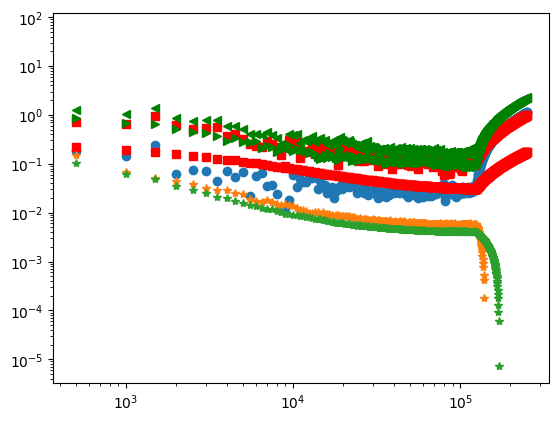

In [27]:
plt.loglog(nmr_pro_intra.f, nmr_pro_intra.R1, 'o')
plt.loglog(nmr_h2o_intra.f, nmr_h2o_intra.R1, 'sr')
plt.loglog(nmr_h2o_inter.f, nmr_h2o_inter.R1, 'sr')
plt.loglog(nmr_h2o_pro.f, nmr_h2o_pro.R1, '*')
plt.loglog(nmr_pro_h2o.f, nmr_pro_h2o.R1, '*')
plt.loglog(nmr_pro_h2o.f, nmr_pro_h2o.R1+nmr_h2o_inter.R1+nmr_h2o_intra.R1+nmr_pro_intra.R1, 'g<')
plt.loglog(nmr_tot_tot.f, nmr_tot_tot.R1, 'g>')

In [2]:
help(nmrmd.NMR)

Help on class NMR in module nmrformd.NMR:

class NMR(builtins.object)
 |  NMR(u: MDAnalysis.core.universe.Universe, atom_group: MDAnalysis.core.groups.AtomGroup, neighbor_group: MDAnalysis.core.groups.AtomGroup = None, type_analysis: str = 'full', number_i: int = 0, isotropic: bool = True, f0: float = None, actual_dt: float = None, hydrogen_per_atom: float = 1.0, spin: float = 0.5, pbc: bool = True)
 |  
 |  Calculate NMR relaxation time from MDAnalysis universe.
 |  
 |  Parameters
 |  ----------
 |  u : MDAnalysis.Universe
 |      MDAnalysis universe containing all the information describing
 |      the molecular dynamics system.
 |  atom_group : MDAnalysis.AtomGroup
 |      Target atom groups for NMR calculation.
 |  neighbor_group : MDAnalysis.AtomGroup
 |      Neighbor atom groups. If not specified, atom_group is used.
 |  type_analysis : str, default ``full``
 |      Type of analysis, which can be ``full``, ``intra_molecular``,
 |      or ``inter_molecular``.
 |  number_i : int, 